# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [46]:
import pandas as pd


data = pd.read_csv("data.csv")

x = data['plans_universitypast_failures'].tolist()

a = []
b = []

for i in range(0, len(x)):
    a.append(int(x[i]/10))
    b.append(int(abs(x[i])%10))

data = data.drop(['plans_universitypast_failures'], axis=1)

data['plans_university'] = a
data['past_failures'] = b

print(data['age'].unique())
current_year = 2006
data['age'] = data['age'].apply(lambda x: current_year - x if x > 30 else x)
print(data['age'].unique())
data.to_csv('data_corrected.csv', index=False)

print(data)

[  16   17   18   15   19 1987 1988 1989   20 1990   21 1991   22]
[16 17 18 15 19 20 21 22]
     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
0     16     4     4           1          2       5         4    4.0   1.0   
1     17     4     4           1          1       5         3    4.0   1.0   
2     16     1     1           2          1       4         5    5.0   2.0   
3     18     1     2           2          1       3         4    4.0   2.0   
4     17     2     1           2          2       4         2    5.0   1.0   
..   ...   ...   ...         ...        ...     ...       ...    ...   ...   
644   18     2     2           4          2       4         2    5.0   1.0   
645   15     4     4           2          2       4         3    1.0   1.0   
646   21     1     1           2          2       5         3    3.0   5.0   
647   16     2     2           1          1       4         3    4.0   1.0   
648   16     2     3          40          2      

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [47]:
nan_count = data.isna().sum()
print(nan_count)
data['goout'].fillna(round(data['goout'].mean(), 1), inplace = True)
data['Dalc'].fillna(round(data['Dalc'].mean(), 1), inplace = True)
data['Walc'].fillna(round(data['Walc'].mean(), 1), inplace = True)
nan_count = data.isna().sum().sum()
print(nan_count)

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
famrel               0
freetime             0
goout                1
Dalc                10
Walc                 6
health               0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
nursery              0
plans_university     0
past_failures        0
dtype: int64
0


C:\Users\nikit\AppData\Local\Temp\ipykernel_13000\2173782381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['goout'].fillna(round(data['goout'].mean(), 1), inplace = True)
C:\Users\nikit\AppData\Local\Temp\ipykernel_13000\2173782381.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

print(data_norm)

[[0.14285714 1.         1.         ... 1.         1.         0.        ]
 [0.28571429 1.         1.         ... 1.         1.         0.        ]
 [0.14285714 0.25       0.25       ... 1.         1.         0.        ]
 ...
 [0.85714286 0.25       0.25       ... 1.         0.         0.66666667]
 [0.14285714 0.5        0.5        ... 1.         0.         0.        ]
 [0.14285714 0.5        0.75       ... 1.         1.         0.        ]]


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv('scores.csv', header=None)

model = LinearRegression()


scores = cross_val_score(model, data, df, cv=4)

print(scores)


[0.24686494 0.26411342 0.1615769  0.22619169]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [50]:
at = pd.read_csv('attendance.csv', sep=";")

at = at.fillna(1).replace({"+": 0})

at["attendance_sum"] = at.sum(axis = 1)
data["attendance_sum"] = at["attendance_sum"]

with open("school_support.txt", "r") as f:
    school_support = [int(line.strip()) for line in f]

data["school_support"] = data.index.isin(school_support).astype(int)
data


C:\Users\nikit\AppData\Local\Temp\ipykernel_13000\979331782.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  at = at.fillna(1).replace({"+": 0})


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance_sum,school_support
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,6,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,2,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0,10,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,2,0
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,2,0
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,-1,2,21,0
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,-1,0,6,0


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'goout'}>],
       [<Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>,
        <Axes: title={'center': 'sex_M'}>],
       [<Axes: title={'center': 'address_U'}>,
        <Axes: title={'center': 'famsize_LE3'}>,
        <Axes: title={'center': 'Pstatus_T'}>,
        <Axes: title={'center': 'nursery'}>],
       [<Axes: title={'center': 'plans_university'}>,
        <Axes: title={'center': 'past_failures'}>,
        <Axes: title={'center': 'attendance_sum'}>,
        <Axes: title={'center': 'school_support'}>]], dtype=object)

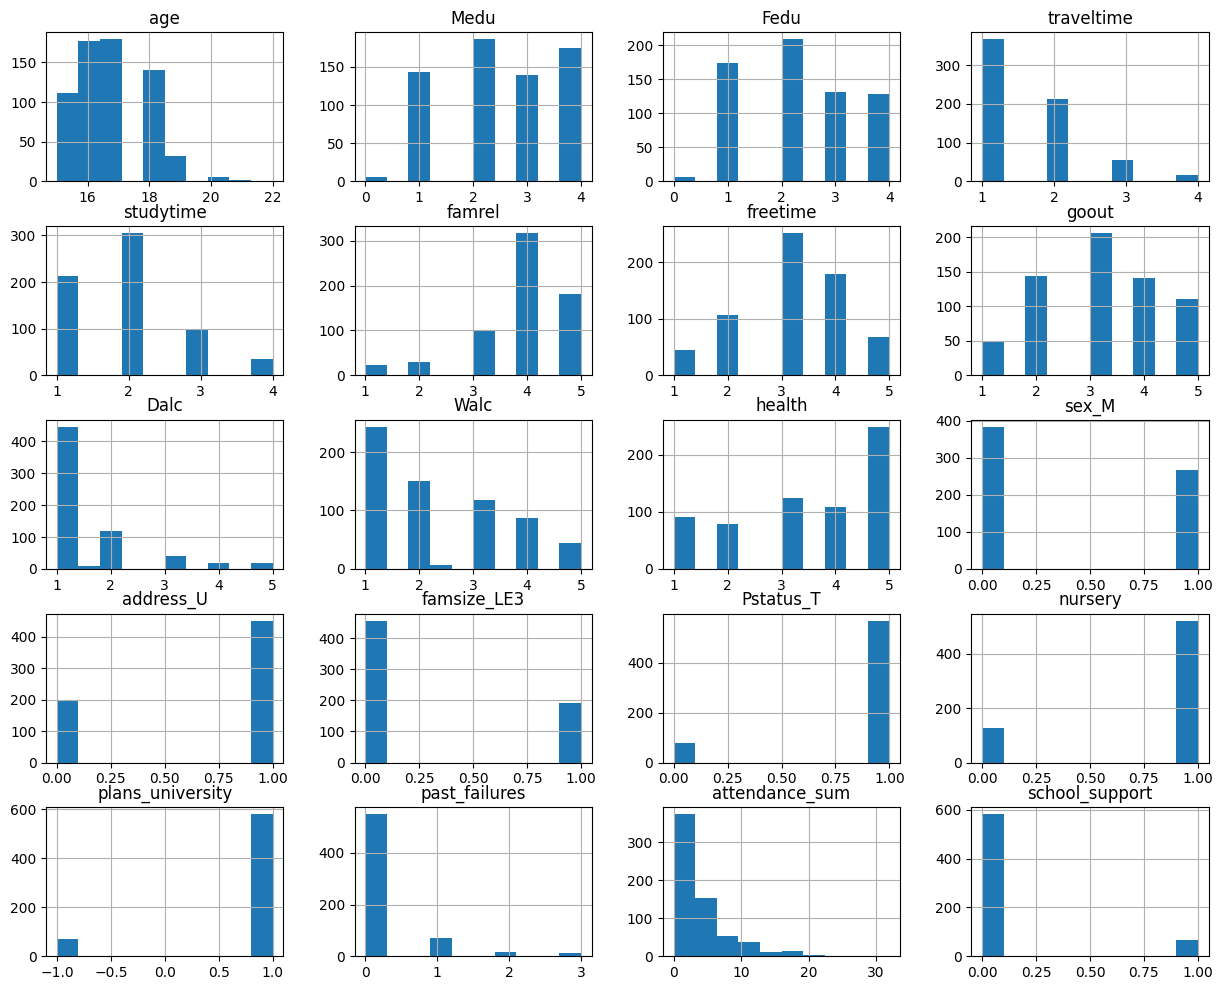

In [55]:
data.hist(figsize=(15, 12))

In [54]:
conditions = [
    data["traveltime"] == 1,
    data["traveltime"] == 2,
    data["traveltime"] == 3,
    data["traveltime"] == 4,
    (data["traveltime"] > 4) & (data["traveltime"] < 15),
    (data["traveltime"] >= 15) & (data["traveltime"] < 30),
    (data["traveltime"] >= 30) & (data["traveltime"] < 60),
    data["traveltime"] >= 60
]

choices = [1, 2, 3, 4, 1, 2, 3, 4]

data["traveltime"] = np.select(conditions, choices)

data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance_sum,school_support
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,6,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,2,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0,10,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,2,0
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,2,0
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,-1,2,21,0
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,-1,0,6,0


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

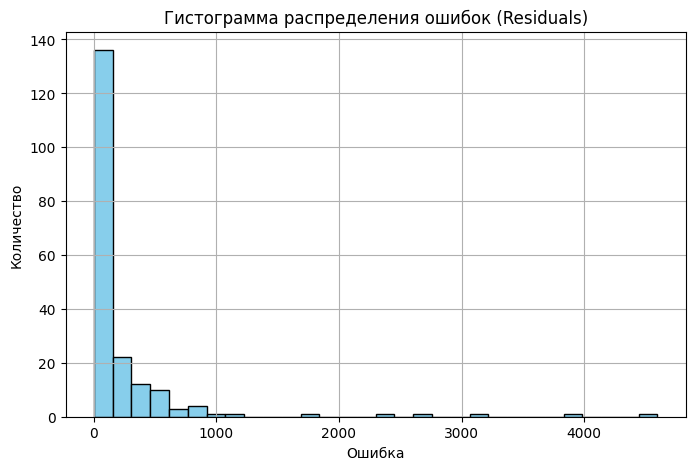

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance_sum,school_support,y_true,y_pred,error
636,16,4,4,1,2,4,3,1.0,1.0,1.0,...,0,1,1,1,0,0,0,65.0,67.133059,4.549943
220,16,4,3,1,1,5,4,5.0,1.0,1.0,...,1,1,0,1,0,7,0,75.0,67.276159,59.657725
594,18,3,2,2,3,5,4,2.0,1.0,1.0,...,1,1,1,1,0,0,0,75.0,63.749076,126.583294
429,16,2,2,1,2,3,3,2.0,1.0,1.0,...,0,0,0,1,0,2,0,50.0,59.096752,82.750890
72,17,2,3,1,2,5,3,3.0,1.0,3.0,...,1,1,0,1,0,0,0,55.0,67.156328,147.776309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,17,4,4,1,2,4,4,4.0,1.0,3.0,...,1,1,1,1,0,0,0,50.0,67.390029,302.413113
256,18,2,1,2,2,5,3,3.0,1.0,2.0,...,0,1,1,1,0,2,0,75.0,66.075176,79.652491
137,19,1,1,2,1,5,5,5.0,2.0,3.0,...,0,1,1,-1,1,0,0,0.0,41.526483,1724.448766
274,18,1,1,2,1,3,3,2.0,1.0,2.0,...,1,1,0,1,0,2,0,70.0,61.567115,71.113543


In [66]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(data, df, test_size=0.3, random_state=42)

regression = linear_model.LinearRegression().fit(X_train, y_train)
prediction = regression.predict(X_test)
errors = (y_test.values - prediction)**2

plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black')
plt.title("Гистограмма распределения ошибок (Residuals)")
plt.xlabel("Ошибка")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

errors_df = X_test.copy()
errors_df["y_true"] = y_test.values
errors_df["y_pred"] = prediction
errors_df["error"] = errors

errors_df

In [ ]:
# Your code here
# ...

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
# Your code here
# ...